In [1]:
import pyhf
import emcee
import numpy as np
import matplotlib.pyplot as plt
import corner
import scipy.stats
%matplotlib inline

In [2]:
class EmceeWrapper(object):
    def __init__(self,model):
        self.model = model

    def lhood_times_prior(self,pars,data):
        mu    = pars[...,0]
        gamma = pars[...,1]
        return np.where(
            mu<0,
            -np.inf,
            self.model.logpdf(pars,data)
        )


In [4]:
w = EmceeWrapper(
    pyhf.simplemodels.hepdata_like([10,10],[50,50],[7,7])
)

nwalkers = 10
npars = len(w.model.config.suggested_init())
init = pyhf.tensorlib.astensor(w.model.config.suggested_init())
sampler = emcee.EnsembleSampler(nwalkers, npars, w.lhood_times_prior, args=[[70,70] + w.model.config.auxdata])
sampler.run_mcmc(
    init+np.random.rand(*(nwalkers,)+pyhf.tensorlib.shape(init)),
    2000
);

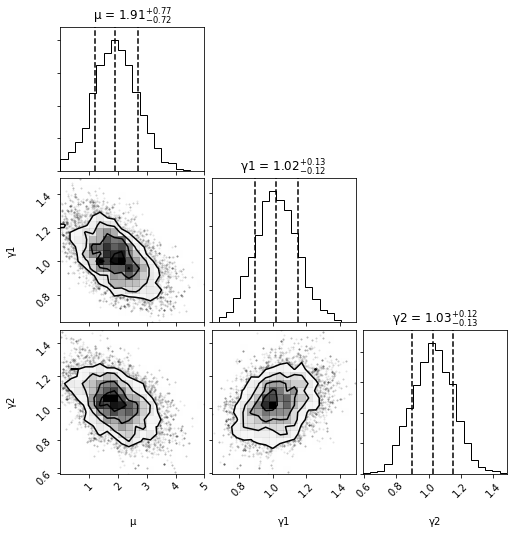

In [5]:
flat_samples = sampler.get_chain(discard=500, flat=True)
figure = corner.corner(
    flat_samples,
    labels = ['µ','γ1','γ2'],
#     truths = [2.0,1.,1.],
    quantiles=[0.16, 0.5, 0.84],
    show_titles=True
)

In [ ]:
#/p((x,y)|pars) = p(x|pars)p(y|pars)

#evidence p((x,y)) = Int [ p(x|pars)p(y|pars) ] dpars